# SECTION 1 : PRE-PROCESSING

---
**Context:**

*Each row of the project dataset represents a customer, each column contains customer’s 
attributes.
The data set includes information about:*


*   *Customers who left within the last month – the column is called Churn*
*   *Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies;*
* *Customer account information – how long they’ve been a customer, contract, payment 
method, paperless billing, monthly charges, and total charges;*
* *Demographic info about customers – gender, age range, and if they have partners and 
dependents.*

---




## **Step 1: Import the modules** 📁



In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pingouin as pg

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn import tree
import warnings
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from numpy.core.numeric import indices
from numpy import mean


## **Step 2: Load the data** ⌛

In [ ]:
df = pd.read_csv('/content/TelecomChurnDataset.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Step 3: Check the overall structure of the dataset** 👀

### 3.1. Check null and missing values 🔎

In [ ]:
# Check null values
cols = df.columns.tolist()
cols.sort()
df = df[cols]
df.info()

# Check missing values
# df.isna().sum()
#Interpreation: No missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   Contract          7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   DeviceProtection  7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   MultipleLines     7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  Partner           7043 non-null   object 
 11  PaymentMethod     7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  SeniorCitizen     7043 non-null   int64  
 14  StreamingMovies   7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  TechSupport       7043 non-null   object 


###3.2. Better understand the variables for each column by displaying the unique values they contain 🔍

In [ ]:
for col in cols:
  print(f'{col} : {df[col].unique()}')  

Churn : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
Dependents : ['No' 'Yes']
DeviceProtection : ['No' 'Yes' 'No internet service']
InternetService : ['DSL' 'Fiber optic' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
MultipleLines : ['No phone service' 'No' 'Yes']
OnlineBackup : ['Yes' 'No' 'No internet service']
OnlineSecurity : ['No' 'Yes' 'No internet service']
PaperlessBilling : ['Yes' 'No']
Partner : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService : ['No' 'Yes']
SeniorCitizen : [0 1]
StreamingMovies : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
tenure : [ 1 34  2 45  8 22 10 2

## **Step 4: Clean the dataset and create new independent variables (X)** 🧹

###4.1. Flatten the categorical variables into several dummy variables 👨‍💻






*Here is our test function to create a new column for 'Month-to-month' contract types:*




```
conditionlist = [
    (df['Contract'] == 'Month-to-month'),
    (df['Contract'] != 'Month-to-month')]
choicelist = [1, 0]
df['Month-to-month'] = np.select(conditionlist, choicelist, default='Not Specified')
print(df)
```

*It helped us build the for loop below:*

In [ ]:
columns_to_flatten = ['Contract', 'InternetService', 'PaymentMethod']

for col in columns_to_flatten:
  for choice in df[col].unique():

    conditionlist = [
        (df[col] == choice),
        (df[col] != choice)]
    choicelist = [1, 0]
    df[choice] = np.select(conditionlist, choicelist, default=0)

#df.head(5)

### 4.2. Create new dummy 'AutomaticPayment' and 'PhoneService' columns with 0/1 values 

In [ ]:
df['AutomaticPayment'] = [0 if choice in ['Electronic check', 'Mailed check']
                      else 1 for choice in df['PaymentMethod']]
                      
df['PhoneService'] = [0 if choice == 'No phone service' 
                      else 1 for choice in df['MultipleLines']]

#df.head(5)
#df['AutomaticPayment'].head(5)
#df['PhoneService'].head(5)

###4.3. Create a new dummy 'InternetService' column with only 0/1 values

In [ ]:
columns_no_internet_service = ['DeviceProtection', 'OnlineBackup',
                            'OnlineSecurity', 'StreamingMovies', 'StreamingTV',
                            'TechSupport']

for col in columns_no_internet_service:
  df['InternetService'] = [0 if choice == 'No internet service' 
                           else 1 for choice in df[col]]
                           
#df['InternetService'].head(15)

###4.4. Change yes/no columns into 0/1 columns 
*('No internet service' and 'No phone service' will be considered as 'No' values and therefore be assigned to 0)*

In [ ]:
columns_yes_no = columns_no_internet_service.copy()

yes_no = ['Churn', 'Dependents', 'PaperlessBilling', 'Partner', 'MultipleLines']

for element in yes_no:
  columns_yes_no.append(element)

print(columns_yes_no)

['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn', 'Dependents', 'PaperlessBilling', 'Partner', 'MultipleLines']


In [ ]:
for col in columns_yes_no:
  df[col] = [1 if value == 'Yes' else 0 for value in df[col]]
  
#df[col].head(5)

## **Step 5: Keep the new X in a new dataset** ⭐

###5.1. Prepare the columns to drop
*(Warning: Only the flattened features, since the other columns were only turned into dummys.)*

In [ ]:
columns_to_drop = columns_to_flatten.copy()
columns_to_drop.remove('InternetService')
print(columns_to_drop) 

['Contract', 'PaymentMethod']


###5.2. Create the new dataset and only keep the right independent (X) and dependent (y=churn) variables

In [ ]:
new_df = df.copy()
new_df = new_df.drop(columns_to_drop, axis=1)
new_df = new_df.drop('customerID', axis=1)
new_df = new_df.drop('No', axis=1)
new_df.head(5)

,Churn,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,...,Month-to-month,One year,Two year,DSL,Fiber optic,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),AutomaticPayment
0,0,0,0,1,29.85,0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
1,0,0,1,1,56.95,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,1,0,0,1,53.85,0,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,1,1,42.30,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
4,1,0,0,1,70.70,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
cols = new_df.columns.tolist()

for col in cols:
  print(f'{col} : {new_df[col].unique()}') 

Churn : [0 1]
Dependents : [0 1]
DeviceProtection : [0 1]
InternetService : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
MultipleLines : [0 1]
OnlineBackup : [1 0]
OnlineSecurity : [0 1]
PaperlessBilling : [1 0]
Partner : [1 0]
PhoneService : [0 1]
SeniorCitizen : [0 1]
StreamingMovies : [0 1]
StreamingTV : [0 1]
TechSupport : [0 1]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
gender : ['Female' 'Male']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Month-to-month : [1 0]
One year : [0 1]
Two year : [0 1]
DSL : [1 0]
Fiber optic : [0 1]
Electronic check : [1 0]
Mailed check : [0 1]
Bank transfer (automatic) : [0 1]
Credit card (automatic) : [0 1]
AutomaticPayment : [0 1]


# SECTION 2: EXPLORATORY ANALYSIS

*Exploratory data analysis and graphs to explain the nature of the dataset, Correlation matrix to understand the correlation between the independent variables.*

## **Part 1: Who are the customers?** 🧐

### Gender, seniors, partners... ♂ ♀, 👴, 💞

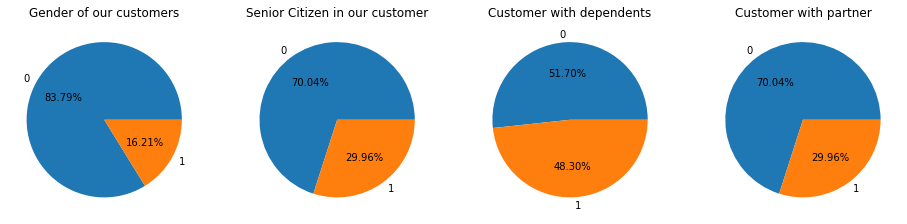

In [ ]:
def plot_chart(x, col_name, chart_title):
  """Plot pie charts"""
  
  new_df[col_name].value_counts().plot.pie(autopct = '%1.2f%%',
                                       shadow = False)
  plt.subplot(x)
  plt.title(chart_title)
  plt.axis("off")

  
plt.fig = plt.figure(figsize=(16,12))
plot_chart(141, 'gender', 'Gender of our customers')
plot_chart(142, 'SeniorCitizen', 'Senior Citizen in our customer')
plot_chart(143, 'Dependents', 'Customer with dependents')
plot_chart(144, 'Partner', "Customer with partner")
plot_chart(143, 'Dependents', 'Customer with dependents')
plt.show()

### Customers with internet service 📶

Text(0.5, 1.0, 'Histogram of Internet Service')

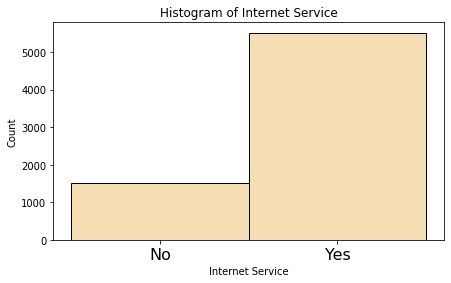

In [ ]:
plt.figure(figsize = (7, 4))
plt.hist(new_df['InternetService'], range = (0, 2), bins = 2,color = 'wheat',
         edgecolor = 'black', align='left')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.title('Histogram of Internet Service')

## **Part 2: Who churn?** 😠

### An overview of churns ✊

0    5174
1    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Number of Churn')

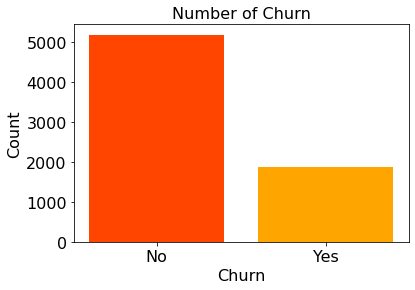

In [ ]:
#new_df = pd.get_dummies(new_df, columns=['MonthlyCharges', 'TotalCharges', 'gender', 'tenure'])

X = new_df.drop(columns=['Churn'])
y = new_df['Churn']

target_distribution = y.value_counts()
print(target_distribution)

plt.figure(figsize = (6, 4))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['orangered', 'orange'])

plt.xlabel('Churn', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Number of Churn', fontsize = 16)

### What are the data correlated with churn ?

In [ ]:
# Correlation between numerical variables with p-value
corr = new_df.rcorr(stars=True, decimals=4)
corr.style.background_gradient(cmap = 'coolwarm')

# Default is 3 stars for p-values < 0.001, 2 stars for p-values < 0.01 and 1 star for p-values < 0.05.

,Churn,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,tenure,Month-to-month,One year,Two year,DSL,Fiber optic,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),AutomaticPayment
Churn,-,***,***,***,***,***,***,***,***,***,,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***
Dependents,-0.1642,-,,***,***,*,*,***,***,***,,***,***,,***,***,***,***,***,***,***,***,***,***,***,***
DeviceProtection,-0.0662,0.014,-,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,,***,***,***,***
InternetService,0.2279,-0.1398,0.3808,-,***,***,***,***,***,,***,***,***,***,***,**,***,**,***,***,***,***,***,,,
MonthlyCharges,0.1934,-0.1139,0.4827,0.7636,-,***,***,***,***,***,***,***,***,***,***,***,***,,***,***,***,***,***,***,*,***
MultipleLines,0.0401,-0.0245,0.2011,0.2106,0.4904,-,***,***,***,***,***,***,***,***,***,***,***,,***,***,***,***,***,***,***,***
OnlineBackup,-0.0823,0.0237,0.3035,0.3816,0.4418,0.2022,-,***,***,***,***,***,***,***,***,***,***,***,***,***,***,,***,***,***,***
OnlineSecurity,-0.1712,0.081,0.2754,0.3334,0.2966,0.0981,0.2838,-,,***,***,**,***,***,***,***,***,***,***,***,**,***,***,***,***,***
PaperlessBilling,0.1918,-0.1114,0.1038,0.321,0.3521,0.1635,0.1267,-0.0036,-,,,***,***,***,**,,***,***,***,***,***,***,***,,,*
Partner,-0.1504,0.4527,0.1538,-0.0006,0.0968,0.1421,0.1415,0.1431,-0.0149,-,,,***,***,***,***,***,***,***,,,***,***,***,***,***


In [ ]:
# As Phone Service is not correlated to Churn, we will remove it.
new_df2 = new_df.copy()
new_df2 = new_df2.drop(columns=['PhoneService'])

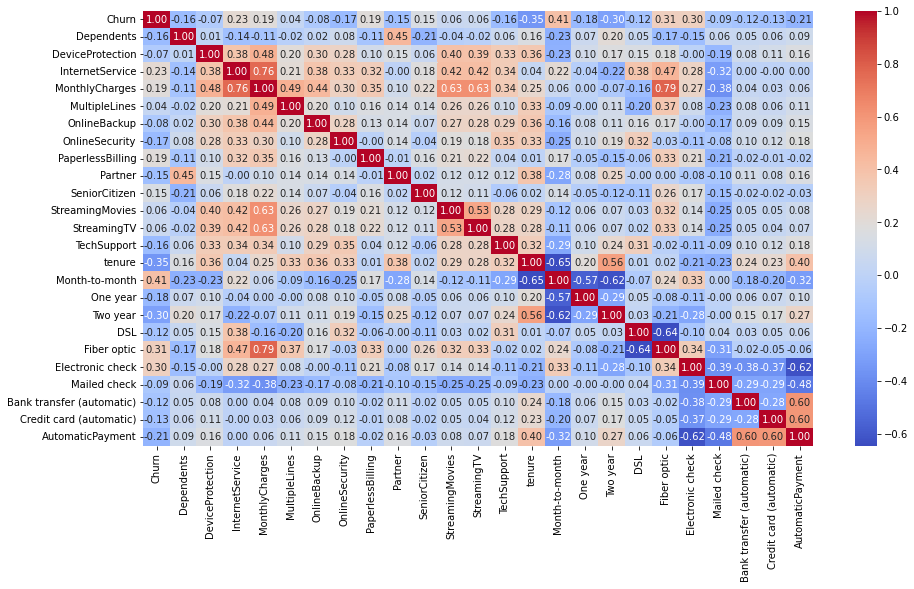

In [ ]:
# Correlation between all variables

plt.figure(figsize=(15,8))
sns.heatmap(new_df2.corr(), annot=True, fmt='.2f', cmap="coolwarm")

In [ ]:
# Remove high correlated features

new_df2=new_df2.drop(columns=['Electronic check','Mailed check','Bank transfer (automatic)',
                           'Credit card (automatic)', 'MonthlyCharges','StreamingMovies',
                           'StreamingTV','TotalCharges','gender'])

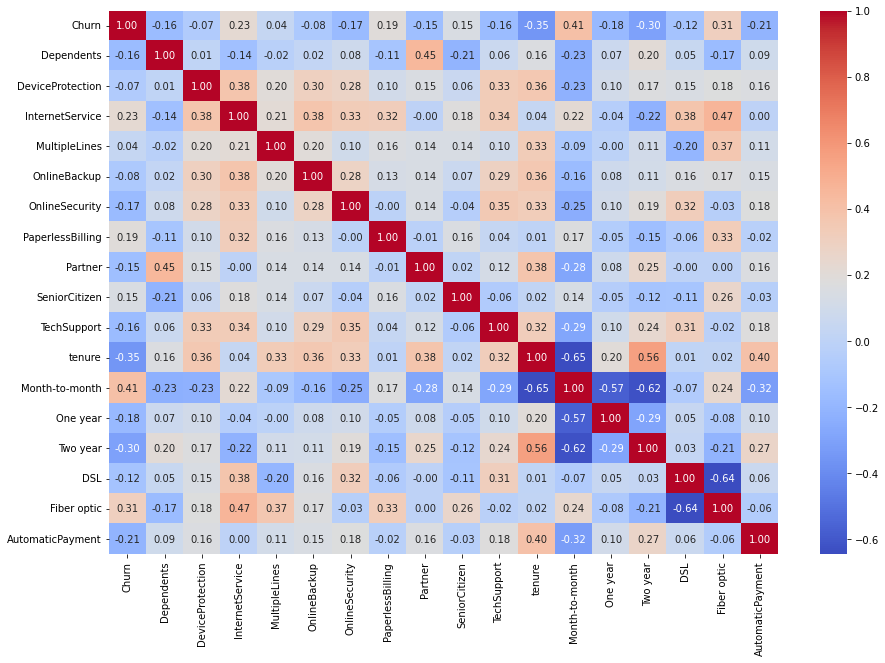

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df2.corr(), annot=True, fmt='.2f', cmap="coolwarm")

In [ ]:
corr = new_df2.rcorr(stars=True, decimals=4)
corr.style.background_gradient(cmap = 'coolwarm')

,Churn,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,SeniorCitizen,TechSupport,tenure,Month-to-month,One year,Two year,DSL,Fiber optic,AutomaticPayment
Churn,-,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***
Dependents,-0.1642,-,,***,*,*,***,***,***,***,***,***,***,***,***,***,***,***
DeviceProtection,-0.0662,0.014,-,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***
InternetService,0.2279,-0.1398,0.3808,-,***,***,***,***,,***,***,**,***,**,***,***,***,
MultipleLines,0.0401,-0.0245,0.2011,0.2106,-,***,***,***,***,***,***,***,***,,***,***,***,***
OnlineBackup,-0.0823,0.0237,0.3035,0.3816,0.2022,-,***,***,***,***,***,***,***,***,***,***,***,***
OnlineSecurity,-0.1712,0.081,0.2754,0.3334,0.0981,0.2838,-,,***,**,***,***,***,***,***,***,**,***
PaperlessBilling,0.1918,-0.1114,0.1038,0.321,0.1635,0.1267,-0.0036,-,,***,**,,***,***,***,***,***,*
Partner,-0.1504,0.4527,0.1538,-0.0006,0.1421,0.1415,0.1431,-0.0149,-,,***,***,***,***,***,,,***
SeniorCitizen,0.1509,-0.2112,0.0594,0.1827,0.1429,0.0666,-0.0387,0.1565,0.0165,-,***,,***,***,***,***,***,**


In [ ]:
# See all latest columns in DF
cols = new_df2.columns.tolist()

for col in cols:
  print(f'{col} : {new_df[col].unique()}') 

Churn : [0 1]
Dependents : [0 1]
DeviceProtection : [0 1]
InternetService : [1 0]
MultipleLines : [0 1]
OnlineBackup : [1 0]
OnlineSecurity : [0 1]
PaperlessBilling : [1 0]
Partner : [1 0]
SeniorCitizen : [0 1]
TechSupport : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Month-to-month : [1 0]
One year : [0 1]
Two year : [0 1]
DSL : [1 0]
Fiber optic : [0 1]
AutomaticPayment : [0 1]


# SECTION 3: BUILD AND EVALUATE THE FIRST MODELS

*Build three models to predict whether a customer would 'churn'. We chose the Random Forest, Decision Tree, and Logistic Regression classifers. We will also investigate factors that influence churn and rank them according to their influences.*

## **Model 1: Random Forest classifier** 🎲

In [ ]:
# 1st model : Random forest classifier

In [ ]:
# Define X and y 
X = new_df2[['Dependents', 'DeviceProtection', 'InternetService', 
             'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
             'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
             'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']]
y = new_df2['Churn']

In [ ]:
# Split the data set for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# Build the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
training_prediction = clf.predict(X_train)

In [ ]:
# Perfom prediction using the test dataset
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction).round(2))
print('Accuracy validation set: ', accuracy_score(y_true=y_test, y_pred=y_pred).round(2))

print('Precision:', metrics.precision_score(y_test, y_pred).round(2))
print('Recall:', metrics.recall_score(y_test, y_pred).round(2))

Accuracy training set:  0.96
Accuracy validation set:  0.77
Precision: 0.58
Recall: 0.53


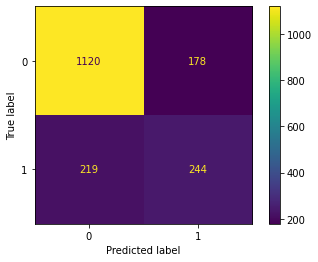

In [ ]:
# Display the Confusion Matrix
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

tenure              0.415344
Month-to-month      0.082795
Fiber optic         0.062756
AutomaticPayment    0.040210
Partner             0.039143
OnlineSecurity      0.037223
PaperlessBilling    0.037109
OnlineBackup        0.036889
MultipleLines       0.036069
DeviceProtection    0.035825
TechSupport         0.033886
Dependents          0.031692
SeniorCitizen       0.030743
Two year            0.027918
InternetService     0.021003
One year            0.016048
DSL                 0.015345
dtype: float64


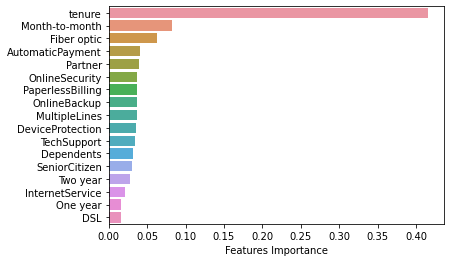

In [ ]:
#Facultative : observe which feature variable are important to improve the model
featureImportances = pd.Series(clf.feature_importances_ ,
                               index=['Dependents', 'DeviceProtection', 'InternetService', 
                                'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
                                'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
                                'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances, 10), y=featureImportances.index)
plt.xlabel('Features Importance')
plt.show()

## **Model 2: Decision tree** 🌲

In [ ]:
# 2nd model : Decision tree

In [ ]:
DTclf = tree.DecisionTreeClassifier()
DTclf=DTclf.fit(new_df2[['Dependents', 'DeviceProtection', 'InternetService', 
                         'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
                         'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
                         'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']],
                new_df2['Churn'])
DT_prediction = DTclf.predict(new_df2[['Dependents', 'DeviceProtection', 'InternetService', 
                         'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
                         'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
                         'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']])
prediction = DTclf.predict(X_test)

[Text(0.33596996785336425, 0.9807692307692307, 'X[11] <= 0.5\ngini = 0.39\nsamples = 7043\nvalue = [5174, 1869]'),
 Text(0.09992546017059983, 0.9423076923076923, 'X[15] <= 0.5\ngini = 0.126\nsamples = 3168\nvalue = [2954, 214]'),
 Text(0.03860028595967285, 0.9038461538461539, 'X[12] <= 0.5\ngini = 0.069\nsamples = 2200\nvalue = [2121, 79]'),
 Text(0.018602018309226837, 0.8653846153846154, 'X[8] <= 0.5\ngini = 0.026\nsamples = 1266\nvalue = [1249, 17]'),
 Text(0.007222189689836232, 0.8269230769230769, 'X[10] <= 24.5\ngini = 0.022\nsamples = 1192\nvalue = [1179, 13]'),
 Text(0.006597567878823369, 0.7884615384615384, 'gini = 0.0\nsamples = 156\nvalue = [156, 0]'),
 Text(0.007846811500849095, 0.7884615384615384, 'X[10] <= 25.5\ngini = 0.025\nsamples = 1036\nvalue = [1023, 13]'),
 Text(0.0012492436220257266, 0.75, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.0006246218110128633, 0.7115384615384616, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.00187386543303859, 

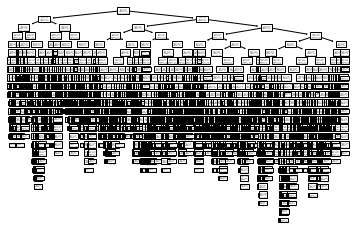

In [ ]:
tree.plot_tree(DTclf)
#Takes some time

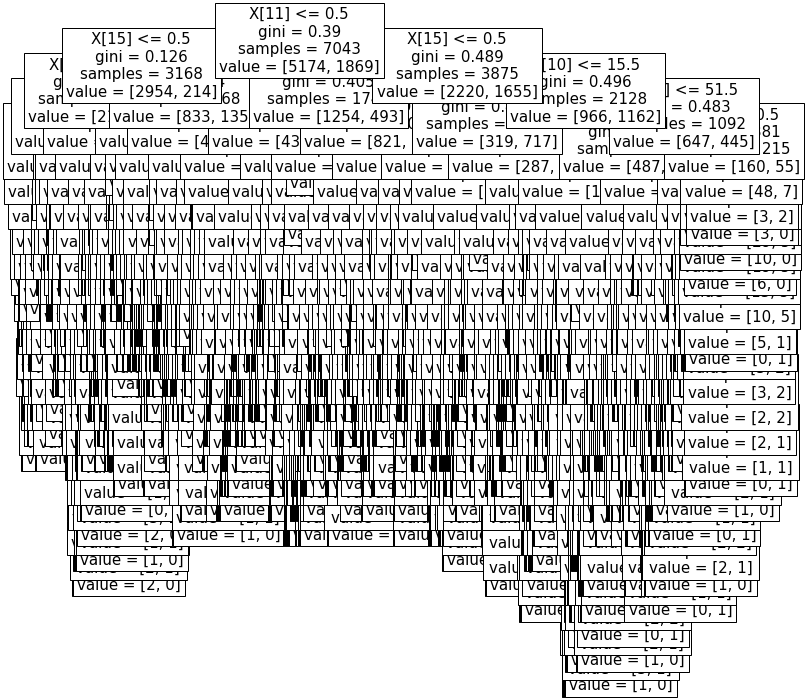

In [ ]:
#Zoom on the main levels 
ZoomDTclf = tree.DecisionTreeClassifier(max_depth=5)
ZoomDTclf=DTclf.fit(new_df2[['Dependents', 'DeviceProtection', 'InternetService', 
                         'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
                         'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
                         'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']],
                new_df2['Churn'])
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(DTclf, fontsize=15)
plt.show()

In [ ]:
DTscore = DTclf.score(new_df2[['Dependents', 'DeviceProtection', 'InternetService', 
                               'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 
                               'Partner', 'SeniorCitizen', 'TechSupport', 'tenure', 'Month-to-month', 
                               'One year', 'Two year', 'DSL', 'Fiber optic', 'AutomaticPayment']],
                      new_df2['Churn'])
print('Accuracy: ', DTscore.round(2))
#print('Precision:', metrics.precision_score(y_test, y_pred).round(2))
#print('Recall:', metrics.recall_score(y_test, y_pred).round(2))

Accuracy:  0.95


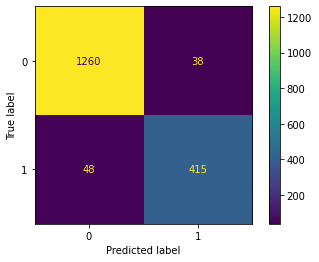

In [ ]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(DTclf, X_test, y_test)  
plt.show()

### **Model 3: Logistic regression** 〽

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [ ]:
X_train.shape

(5282, 17)

In [ ]:
# Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Perfom prediction using the test dataset
y_pred = log_reg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred).round(2))
print('Precision:', metrics.precision_score(y_test, y_pred).round(2))
print('Recall:', metrics.recall_score(y_test, y_pred).round(2))

Accuracy: 0.81
Precision: 0.62
Recall: 0.56


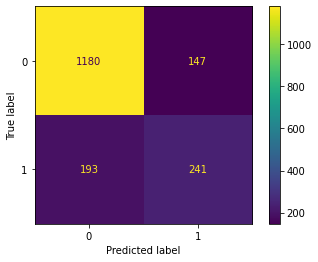

In [ ]:
# Display the Confusion Matrix
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()